In [1]:
!pip install torch torchvision torchattacks matplotlib

Original Prediction: tusker


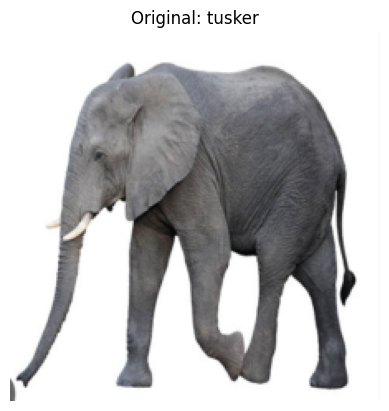

In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchattacks import FGSM
import requests

# DEVICE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# TRANSFORMS for ResNet input
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# LOAD PRE-TRAINED RESNET MODEL
model = torchvision.models.resnet18(pretrained=True)
model = model.to(device)
model.eval()

# DOWNLOAD IMAGENET CLASS LABELS
with open('imagenet_classes.txt', 'r') as f:
    imagenet_labels = dict(enumerate(f.read().splitlines()))

# DISPLAY IMAGE FUNCTION
def imshow(img_tensor, title=""):
    npimg = img_tensor.cpu().numpy()
    npimg = np.transpose(npimg, (1, 2, 0))  # Convert to HWC for matplotlib
    plt.imshow(np.clip(npimg, 0, 1))  # Clip to ensure valid range
    plt.title(title)
    plt.axis('off')
    plt.show()

# LOAD AND PREPROCESS IMAGE
image_path = 'elephant.png'  
image = Image.open(image_path).convert('RGB')
image_tensor = transform(image).unsqueeze(0).to(device)

# PREDICT
outputs = model(image_tensor)
_, predicted = torch.max(outputs.data, 1)
original_prediction = imagenet_labels[predicted.item()]

print(f"Original Prediction: {original_prediction}")
imshow(image_tensor[0], f"Original: {original_prediction}")


Adversarial Prediction: African elephant


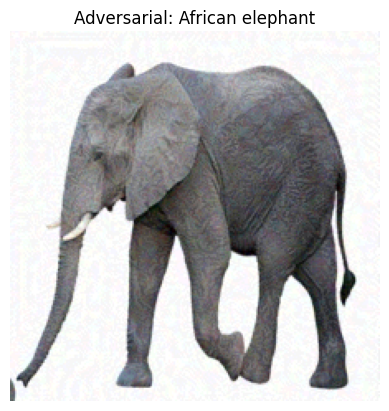

In [13]:
# FGSM Adversarial Attack
atk = FGSM(model, eps=0.03)
labels = predicted  # Using predicted label as dummy
adv_images = atk(image_tensor, labels)

# Predict 
adv_outputs = model(adv_images)
_, adv_predicted = torch.max(adv_outputs.data, 1)
fgsm_prediction = imagenet_labels[adv_predicted.item()]

print(f"Adversarial Prediction: {imagenet_labels[adv_predicted.item()]}")
imshow(adv_images[0], f"Adversarial: {imagenet_labels[adv_predicted.item()]}")

Adversarial Prediction (BIM): brassiere


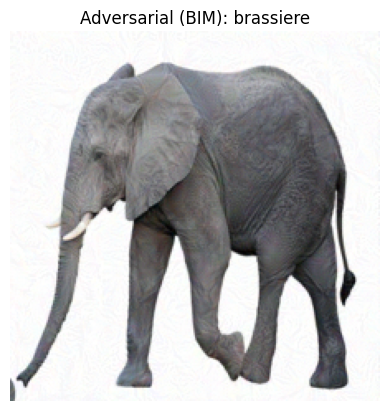

In [14]:
from torchattacks import BIM

# Basic Iterative Method (BIM) Adversarial Attack
atk = BIM(model, eps=0.03, alpha=0.005, steps=10)
labels = predicted  # Using predicted label as dummy
adv_images = atk(image_tensor, labels)

# Predict
adv_outputs = model(adv_images)
_, adv_predicted = torch.max(adv_outputs.data, 1)
bim_prediction = imagenet_labels[adv_predicted.item()]

print(f"Adversarial Prediction (BIM): {imagenet_labels[adv_predicted.item()]}")
imshow(adv_images[0], f"Adversarial (BIM): {imagenet_labels[adv_predicted.item()]}")


Adversarial Prediction (PGD): brassiere


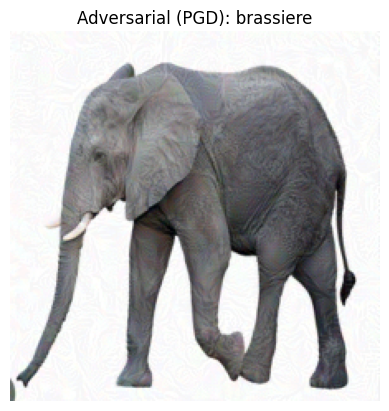

In [15]:
from torchattacks import PGD

# PGD Adversarial Attack
atk = PGD(model, eps=0.03, alpha=0.005, steps=40, random_start=True)
labels = predicted  # Using predicted label as dummy
adv_images = atk(image_tensor, labels)

# Predict
adv_outputs = model(adv_images)
_, adv_predicted = torch.max(adv_outputs.data, 1)
pgd_prediction = imagenet_labels[adv_predicted.item()]

print(f"Adversarial Prediction (PGD): {imagenet_labels[adv_predicted.item()]}")
imshow(adv_images[0], f"Adversarial (PGD): {imagenet_labels[adv_predicted.item()]}")


Adversarial Prediction (MIM): brassiere


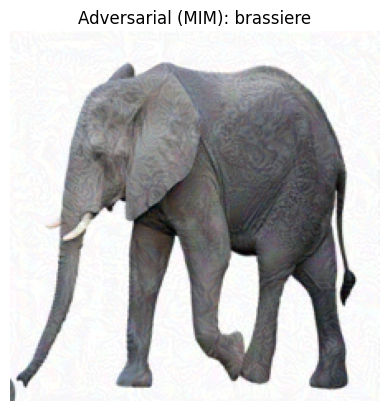

In [17]:
from torchattacks import MIFGSM

# MIM Adversarial Attack
atk = MIFGSM(model, eps=0.03, alpha=0.005, steps=10, decay=1.0)
labels = predicted  # Using predicted label as dummy
adv_images = atk(image_tensor, labels)

# Predict Adversarial Image
adv_outputs = model(adv_images)
_, adv_predicted = torch.max(adv_outputs.data, 1)
pgd_prediction = imagenet_labels[adv_predicted.item()]

print(f"Adversarial Prediction (MIM): {imagenet_labels[adv_predicted.item()]}")
imshow(adv_images[0], f"Adversarial (MIM): {imagenet_labels[adv_predicted.item()]}")


 Adversarial Prediction (C&W): African elephant


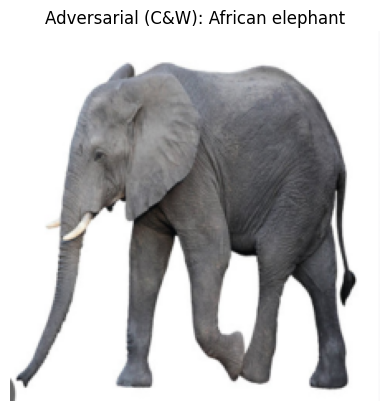

In [19]:
from torchattacks import CW

# ✅ Carlini & Wagner (C&W) Attack
atk = CW(model, c=1e-4, kappa=0, steps=1000, lr=0.01)
labels = predicted  # Using predicted label as dummy (optional for targeted attack)
adv_images = atk(image_tensor, labels)

# ✅ Predict Adversarial Image
adv_outputs = model(adv_images)
_, adv_predicted = torch.max(adv_outputs.data, 1)
cw_prediction = imagenet_labels[adv_predicted.item()]

print(f" Adversarial Prediction (C&W): {imagenet_labels[adv_predicted.item()]}")
imshow(adv_images[0], f"Adversarial (C&W): {imagenet_labels[adv_predicted.item()]}")


In [20]:
print("=" * 60)
print(f"Original Prediction       : {original_prediction}")
print(f"Prediction after FGSM     : {fgsm_prediction}")
print(f"Prediction after BIM      : {bim_prediction}")
print(f"Prediction after PGD      : {pgd_prediction}")
print(f"Prediction after MIM      : {mim_prediction}")
print(f"Prediction after C&W      : {cw_prediction}")
print("=" * 60)

Original Prediction       : tusker
Prediction after FGSM     : African elephant
Prediction after BIM      : brassiere
Prediction after PGD      : brassiere


NameError: name 'mim_prediction' is not defined